``[obspy]``<br/>
---
https://github.com/obspy/obspy/wiki#contents

ObsPy is an open-source project dedicated to provide a Python framework for processing seismological data. It provides parsers for common file formats, clients to access data centers and seismological signal processing routines which allow the manipulation of seismological time series.

The goal of the ObsPy project is to facilitate rapid application development for seismology.


打开文件

In [2]:
from obspy.io.segy.segy import _read_segy
file='D:/Code/Code/Python Code/data/data_sgy/1.sgy'
data=_read_segy(file)

查看头文件可用列表

In [3]:
print(data.__dir__())
print(len(data.__dir__()))

['file', 'endian', 'textual_header_encoding', 'textual_file_header', 'binary_file_header', 'data_encoding', 'traces', '__module__', '__doc__', '__init__', '__str__', '_repr_pretty_', '_autodetect_endianness', '_create_empty_segy_file_object', '_read_textual_header', '_read_headers', 'write', '_write', '_write_textual_header', '_read_traces', '__dict__', '__weakref__', '__repr__', '__hash__', '__getattribute__', '__setattr__', '__delattr__', '__lt__', '__le__', '__eq__', '__ne__', '__gt__', '__ge__', '__new__', '__reduce_ex__', '__reduce__', '__subclasshook__', '__init_subclass__', '__format__', '__sizeof__', '__dir__', '__class__']
42


In [4]:
print(data.binary_file_header)

Binary File Header:
	job_identification_number: 0
	line_number: 0
	reel_number: 0
	number_of_data_traces_per_ensemble: 100
	number_of_auxiliary_traces_per_ensemble: 0
	sample_interval_in_microseconds: 500
	sample_interval_in_microseconds_of_original_field_recording: 0
	number_of_samples_per_data_trace: 1024
	number_of_samples_per_data_trace_for_original_field_recording: 0
	data_sample_format_code: 1
	ensemble_fold: 0
	trace_sorting_code: 0
	vertical_sum_code: 0
	sweep_frequency_at_start: 0
	sweep_frequency_at_end: 0
	sweep_length: 0
	sweep_type_code: 0
	trace_number_of_sweep_channel: 0
	sweep_trace_taper_length_in_ms_at_start: 0
	sweep_trace_taper_length_in_ms_at_end: 0
	taper_type: 0
	correlated_data_traces: 0
	binary_gain_recovered: 0
	amplitude_recovery_method: 0
	measurement_system: 1
	impulse_signal_polarity: 0
	vibratory_polarity_code: 0
	unassigned_1: b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

数据道——道头文件可调用的list

In [5]:
print(data.traces[0].header.__dir__())
print(len(data.traces[0].header.__dir__()))

['endian', 'unpacked_header', 'number_of_samples_in_this_trace', '__module__', '__doc__', '__init__', '_read_trace_header', 'write', '__getattr__', '__str__', '_repr_pretty_', '_create_empty_trace_header', '__dict__', '__weakref__', '__repr__', '__hash__', '__getattribute__', '__setattr__', '__delattr__', '__lt__', '__le__', '__eq__', '__ne__', '__gt__', '__ge__', '__new__', '__reduce_ex__', '__reduce__', '__subclasshook__', '__init_subclass__', '__format__', '__sizeof__', '__dir__', '__class__']
34


In [6]:
print(data.traces[0].header.number_of_samples_in_this_trace)
print(data.traces[0].header.__dict__.keys())

1024
dict_keys(['endian', 'unpacked_header', 'number_of_samples_in_this_trace'])


In [7]:
print(data.traces.__len__())#地震道数
print(len(data.traces[0].data))#Trace Samples 
print(data.traces[0].data.size)#
print(data.traces[0].data.shape)

100
1024
1024
(1024,)


In [8]:
print(data.binary_file_header.sample_interval_in_microseconds)#采样间隔：us
dt=data.binary_file_header.sample_interval_in_microseconds
print(len(data.traces[0].data))#Trace Samples 
data_len=len(data.traces[0].data)

500
1024


提取一道绘图

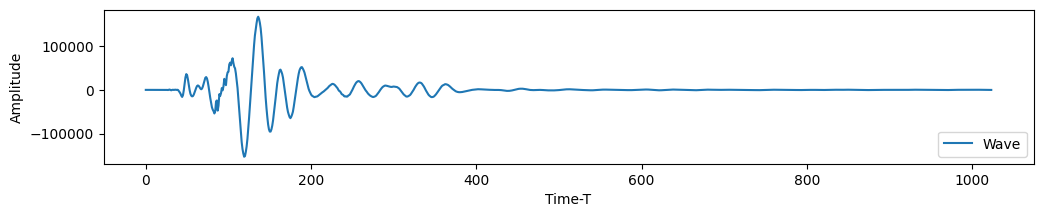

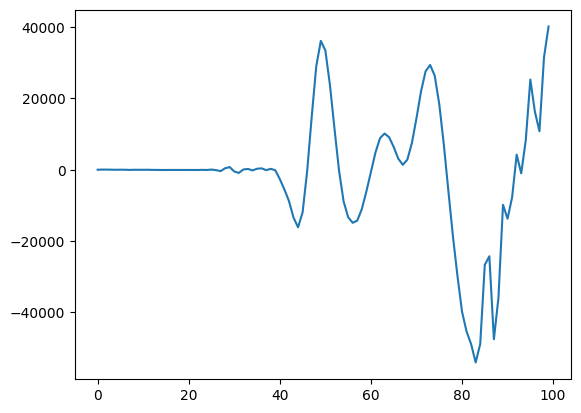

In [14]:
i=12
data.traces[i].data
y=data.traces[i].data
import numpy as np
t=np.arange(0,data_len*dt/1000)#记录长度
x=len(data.traces[0].data)
x=np.arange(0,x)
import matplotlib.pyplot as plt
fig,axs=plt.subplots(figsize=(12,2))
axs.plot(x,y,label="Wave")
axs.legend(loc="lower right",fontsize=10)
axs.set_xlabel('Time-T')
axs.set_ylabel('Amplitude')
# axs.set_xscale('log')
plt.show()
plt.plot(y[:100])
plt.show()

# UTCDateTime

## 初始化

In [9]:
from obspy.core import UTCDateTime
time=UTCDateTime()#当前时间
time.year
time.month#属性
print(time)

2023-03-17T13:49:11.002361Z


## 属性访问，时间差

In [10]:
time2=UTCDateTime('1996-12-21T08:00:00')
time_3=time-time2#时间差
print(time_3)
UTCDateTime(0)#协调时间时


827905751.002361


1970-01-01T00:00:00.000000Z

# Read Data

读入文件

In [11]:
from obspy import read
st=read('D:/code/Python Code/data/obspy/RJOB_061005_072159.ehz.new')#直接下载
print(st)
print(len(st))
print(st)

1 Trace(s) in Stream:
.RJOB..Z | 2005-10-06T07:21:59.850000Z - 2005-10-06T07:24:59.845000Z | 200.0 Hz, 36000 samples
1
1 Trace(s) in Stream:
.RJOB..Z | 2005-10-06T07:21:59.850000Z - 2005-10-06T07:24:59.845000Z | 200.0 Hz, 36000 samples


地震图元数据

In [12]:
tr=st[0]
print(tr.stats)
print('station:',tr.stats.station)
print("datatype:",tr.stats.gse2.datatype)

         network: 
         station: RJOB
        location: 
         channel: Z
       starttime: 2005-10-06T07:21:59.850000Z
         endtime: 2005-10-06T07:24:59.845000Z
   sampling_rate: 200.0
           delta: 0.005
            npts: 36000
           calib: 0.0949
         _format: GSE2
            gse2: AttribDict({'auxid': 'RJOB', 'datatype': 'CM6', 'calper': 1.0, 'instype': '', 'hang': -1.0, 'vang': -1.0, 'lat': -999.0, 'lon': -999.0, 'coordsys': '', 'elev': -0.999, 'edepth': -0.999})
station: RJOB
datatype: CM6


访问波形文件

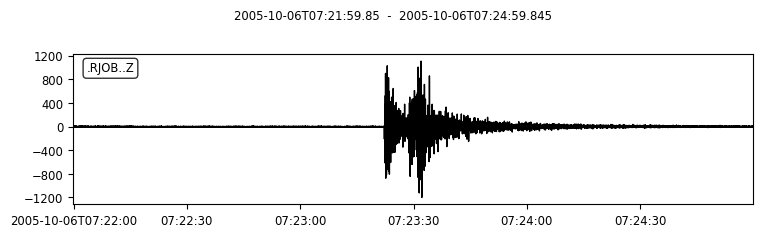

In [13]:
tr.data
len(tr.data)
st.plot()
plt.show()

波形绘制

1 Trace(s) in Stream:
DK.COP..BHZ | 2009-02-19T00:00:00.025100Z - 2009-02-19T23:59:59.975100Z | 20.0 Hz, 1728000 samples
3 Trace(s) in Stream:
DK.COP..BHE | 2009-02-19T00:00:00.035100Z - 2009-02-19T23:59:59.985100Z | 20.0 Hz, 1728000 samples
DK.COP..BHN | 2009-02-19T00:00:00.025100Z - 2009-02-19T23:59:59.975100Z | 20.0 Hz, 1728000 samples
DK.COP..BHZ | 2009-02-19T00:00:00.025100Z - 2009-02-19T23:59:59.975100Z | 20.0 Hz, 1728000 samples


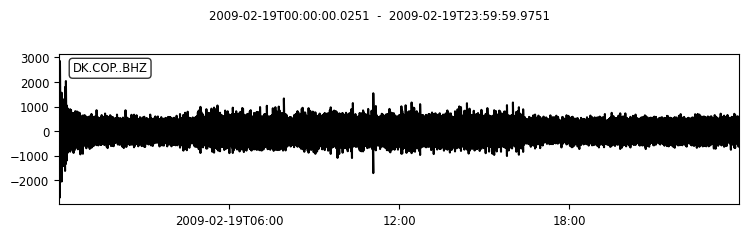

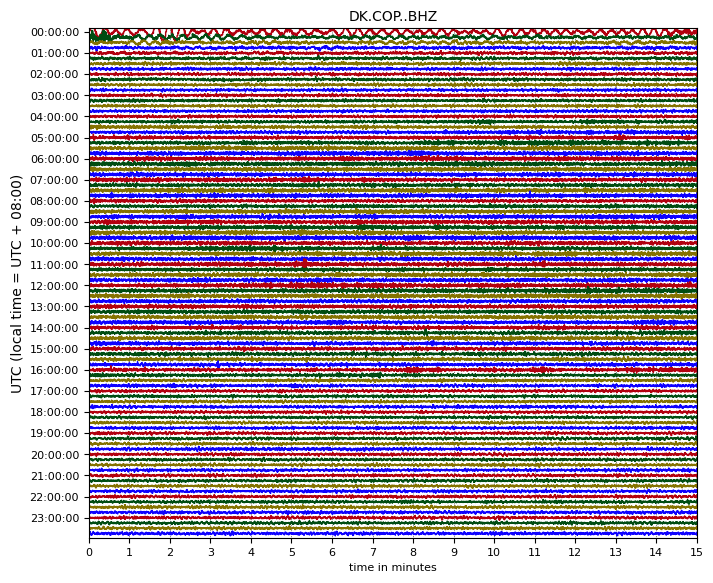

In [14]:
singlechannel = read('D:/code/Python Code/data/obspy/COP.BHZ.DK.2009.050')
print(singlechannel)

threechannels=read('D:/code/Python Code/data/obspy/COP.BHE.DK.2009.050')
threechannels+=read('D:/code/Python Code/data/obspy/COP.BHN.DK.2009.050')
threechannels+=read('D:/code/Python Code/data/obspy/COP.BHZ.DK.2009.050')
print(threechannels)

singlechannel.plot()#默认 绘图的大小为 800x250 像素
singlechannel.plot(type='dayplot')
plt.show()

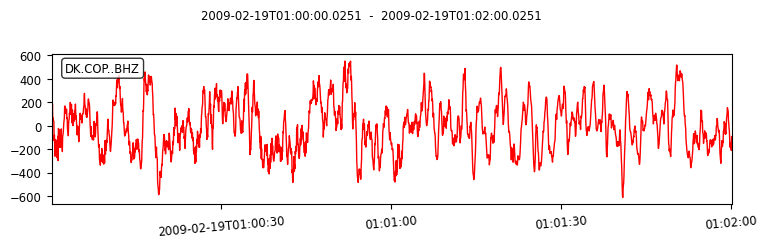

In [15]:
dt = singlechannel[0].stats.starttime
singlechannel.plot(color='red', tick_rotation=5, tick_format='%I:%M %p',
                    starttime=dt + 60*60, endtime=dt + 60*60 + 120)
plt.show()

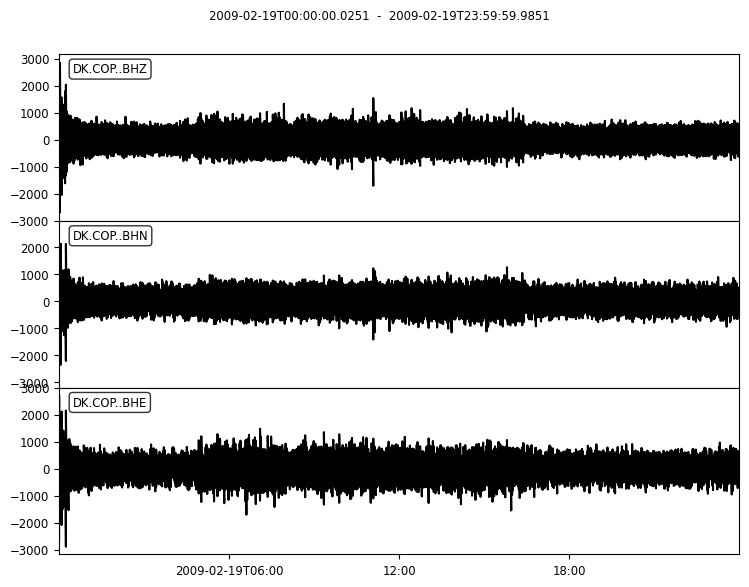

In [16]:
threechannels.plot(size=(800, 600))
plt.show()

# 从数据中心检索数据

In [17]:
import obspy.clients.fdsn


滤波

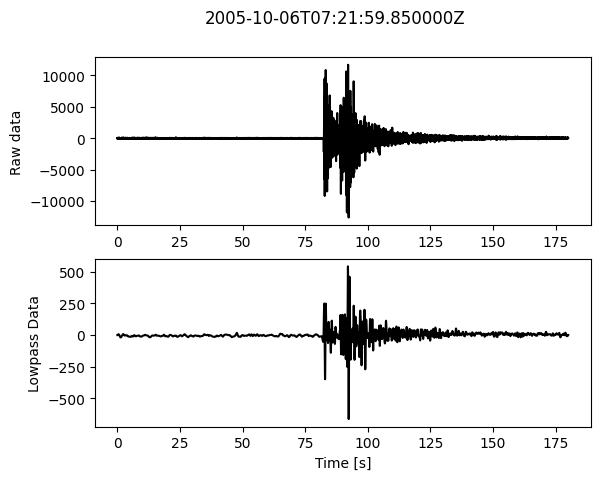

In [18]:
st=obspy.read('D:/code/Python Code/data/obspy/RJOB_061005_072159.ehz.new')
tr=st[0]
tr_filt=tr.copy()
tr_filt.filter('lowpass',freq=1.0,corners=2,zerophase=True)
import numpy as np
t=np.arange(0,tr.stats.npts/tr.stats.sampling_rate,tr.stats.delta)

plt.subplot(211)
plt.plot(t,tr.data,'k')

plt.ylabel('Raw data')
plt.subplot(212)
plt.plot(t,tr_filt.data,'k')
plt.ylabel('Lowpass Data')
plt.xlabel('Time [s]')
plt.suptitle(tr.stats.starttime)
plt.show()


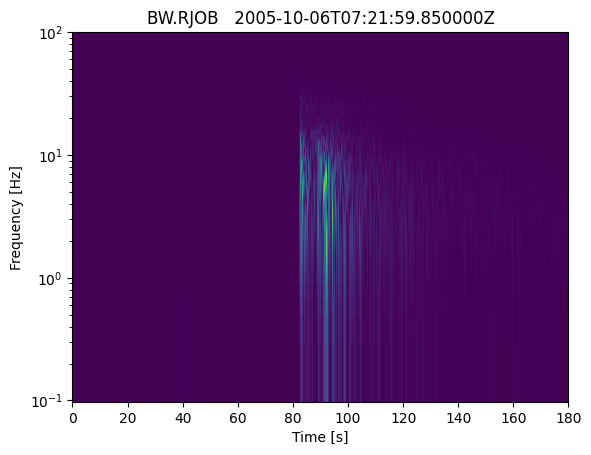

[None]

In [24]:
st.spectrogram(log='True', title=f'BW.RJOB   {str(st[0].stats.starttime)}')